In [3]:
%matplotlib inline

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model

import os

2023-04-05 15:19:02.277169: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-05 15:19:02.280039: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-05 15:19:02.342600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-05 15:19:02.343269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 15:19:03.143843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
# unzip file with zipfile
import zipfile
with zipfile.ZipFile('bean-disease-dataset.zip', 'r') as zip_ref:
      zip_ref.extractall('')



In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./Bean_Dataset",
    seed=85,
    # To randomly shuffle all the images
    shuffle=True,
    # Input image size
    image_size=(256, 256),
    # Set batch size to 32
    batch_size=32
)

Found 990 files belonging to 3 classes.


2023-04-05 15:29:17.946715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-05 15:29:17.948483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-05 15:29:17.950308: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [6]:
bean_classes = dataset.class_names
bean_classes

['angular_leaf_spot', 'bean_rust', 'healthy']

**Summary**<br>
Our dataset contains 990 files belonging to three classes:<br>
**`angular_leaf_spot`**,<br>
**`bean_rust`**, and<br>
**`healthy`**.

<h4 style="background-color:#1a4d08;color:white; padding:12px">2.2. DATA VISUALIZATION</h4>

Let's have a quick look at some of our images.

2023-04-05 15:29:55.426998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [990]
	 [[{{node Placeholder/_0}}]]
2023-04-05 15:29:55.427407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [990]
	 [[{{node Placeholder/_0}}]]


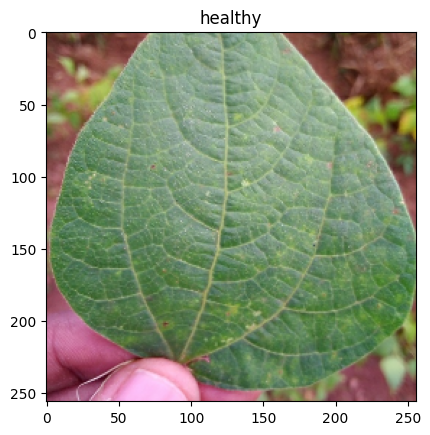

In [7]:
# Printing an image
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(bean_classes[labels_batch[0]])

2023-04-05 15:29:58.232135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [990]
	 [[{{node Placeholder/_4}}]]
2023-04-05 15:29:58.232558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [990]
	 [[{{node Placeholder/_4}}]]


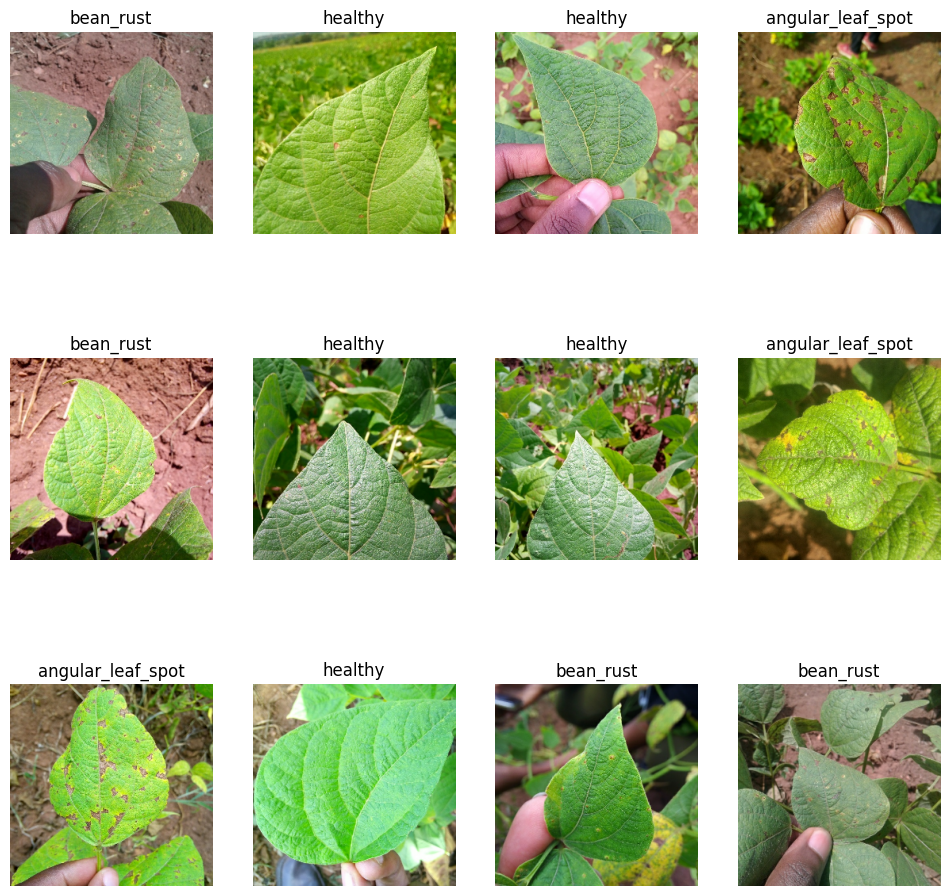

In [8]:
# First 12 images in the a batch
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(bean_classes[labels_batch[i]])
        plt.axis("off")

Let's see another batch of 12 images.

2023-04-05 15:30:43.421613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [990]
	 [[{{node Placeholder/_4}}]]
2023-04-05 15:30:43.422020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [990]
	 [[{{node Placeholder/_4}}]]


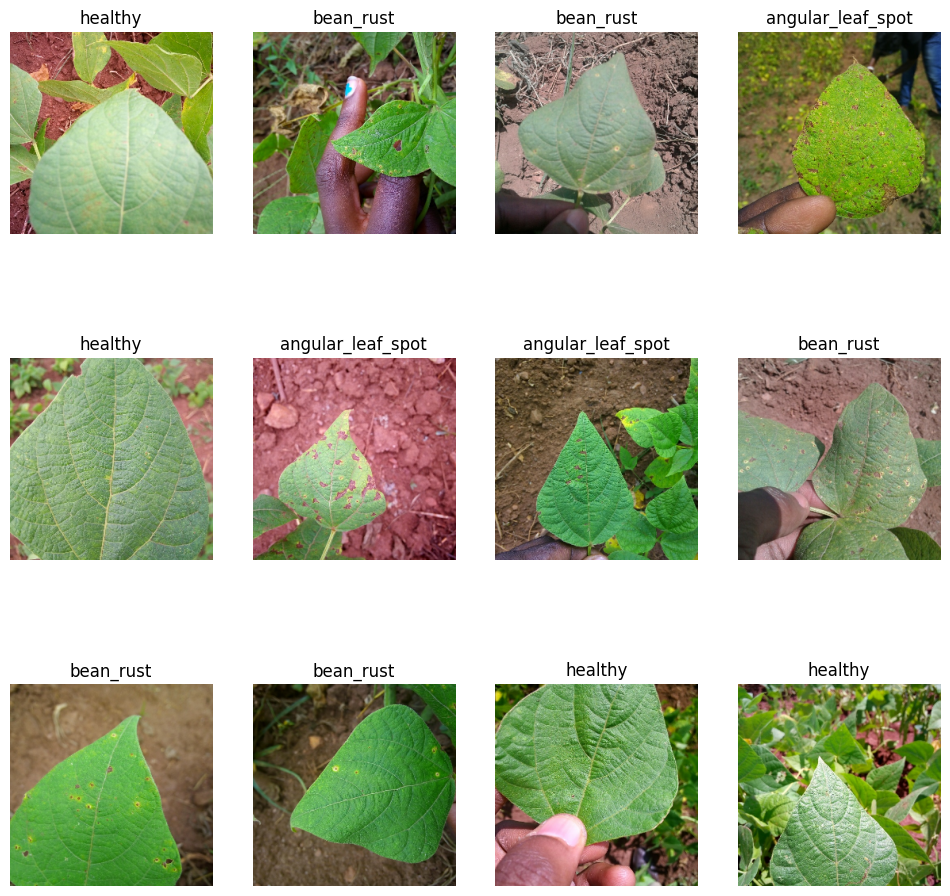

In [9]:
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(bean_classes[labels_batch[i]])
        plt.axis("off")

# 3. Split Dataset Into Train, Test, and Validation Sets

In [10]:
# Print the number of batches 
# In our dataset
len(dataset)

31

There are a total of 31 batches in our dataset.<br>
Out of the 31 batches, we will keep 80% as our training data.<br>
From the remaining 20%, 10% will be the validation set, which will be used in the training process. We will keep another 10% as the test set.

<h4 style="background-color:#1a4d08;color:white; padding:12px">3.1. HELPER FUNCTION TO SPLIT OUR DATA</h4>

Let's write a helper function that will split our data into train, validation, and test sets.

In [11]:
def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    """
    Takes a dataset and splits it into train, validation and test sets. 
    """
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=85)
    
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    
    train_set = dataset.take(train_size)    
    val_set = dataset.skip(train_size).take(val_size)
    test_set = dataset.skip(train_size).skip(val_size)
    
    return train_set, val_set, test_set

In [12]:
train_set, val_set, test_set = get_dataset_partitions_tf(dataset)

In [13]:
# Visualize the lenght of our splits
len(train_set), len(val_set), len(test_set)

(24, 3, 4)

**Train Set** = 24 batches<br>
**Validation set** = 3 batches<br>
**Test Set** = 4 batches

# 4. Configuring the Dataset for Better Performance
We will configure our dataset for better performance using the buffer prefetch, shuffling and cache method. We are going to do this for the train, validation and test splits.

* **Prefetching** helps minimize the step time to the maximum of the training and the time it takes to extract the data.
* **Caching** helps cache a dataset, either in memory or on local storage, which helps save some operations like file opening and data reading from being executed during epoch. **[Reference](https://www.tensorflow.org/guide/data_performance)**.

In [14]:
print("Configuring the dataset for better performance")
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set = val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Configuring the dataset for better performance


# 5. Data Preprocessing
<h4 style="background-color:#1a4d08;color:white; padding:12px">5.1. RESIZE AND RESCALING THE DATA</h4>

Even though the images are already 256 X 256 in dimension, we still need to resize it so that if an image that is not within this dimension is inputted during prediction, it will automatically resize it. 

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

<h4 style="background-color:#1a4d08;color:white; padding:12px">5.2. DATA AUGMENTATION</h4>

Since we are not working with a huge data, we will do data augmentation to boost accuracy of our model. Data augmentation artificially increases the amount of data by generating new data points from existing data. **[Reference](https://www.v7labs.com/blog/data-augmentation-guide)**.

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
# Apply data augmentation to train dataset

train_set = train_set.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# 6. Modeling

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.1. BUILD THE MODEL</h4>

For this we'll use the convolutional neural network (CNN). In building this model, we will pass a couple of layers: `resize_and_rescale`, `data_augmentation`, `Conv2D`, `Maxpooling2D`, `Flatten`, and `Dense` layers.

In [18]:
input_shape = (32, 256, 256, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [19]:
# View summary of our model parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                  

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.2. COMPILE THE MODEL</h4>

We'll use the `adam` optimizer. And then define the `loss` and `accuracy` metrics in each epoch.

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.3. FIT THE MODEL</h4>

In [21]:
history = model.fit(
    train_set,
    batch_size=32,
    validation_data=val_set,
    verbose=1,
    epochs=60,
)

Epoch 1/60


2023-04-05 15:33:36.328604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [990]
	 [[{{node Placeholder/_0}}]]
2023-04-05 15:33:36.329232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [990]
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - ETA: 0s - loss: 1.0855 - accuracy: 0.4021

2023-04-05 15:33:44.443309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [990]
	 [[{{node Placeholder/_0}}]]
2023-04-05 15:33:44.443914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [990]
	 [[{{node Placeholder/_4}}]]


24/24 [==============================] - 8s 271ms/step - loss: 1.0855 - accuracy: 0.4021 - val_loss: 1.0180 - val_accuracy: 0.5312
Epoch 2/60
24/24 [==============================] - 6s 260ms/step - loss: 0.9798 - accuracy: 0.5131 - val_loss: 0.9113 - val_accuracy: 0.5625
Epoch 3/60
24/24 [==============================] - 6s 261ms/step - loss: 0.9344 - accuracy: 0.5379 - val_loss: 0.8322 - val_accuracy: 0.6667
Epoch 4/60
24/24 [==============================] - 6s 260ms/step - loss: 0.9400 - accuracy: 0.5679 - val_loss: 0.8827 - val_accuracy: 0.6458
Epoch 5/60
24/24 [==============================] - 6s 260ms/step - loss: 0.8804 - accuracy: 0.6005 - val_loss: 0.8214 - val_accuracy: 0.6354
Epoch 6/60
24/24 [==============================] - 6s 260ms/step - loss: 0.8281 - accuracy: 0.6540 - val_loss: 0.8623 - val_accuracy: 0.5938
Epoch 7/60
24/24 [==============================] - 6s 260ms/step - loss: 0.7758 - accuracy: 0.6632 - val_loss: 0.8160 - val_accuracy: 0.6042
Epoch 8/60
24/24 

In [22]:
# Evaluate model performance on test set
scores = model.evaluate(test_set)

1/4 [======>.......................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8438

2023-04-05 15:40:32.619232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [990]
	 [[{{node Placeholder/_4}}]]
2023-04-05 15:40:32.619850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [990]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - 0s 16ms/step - loss: 0.3622 - accuracy: 0.8672


In [23]:
scores

[0.3621599078178406, 0.8671875]

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.4. PLOT ACCURACY AND LOSS CURVE</h4>

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

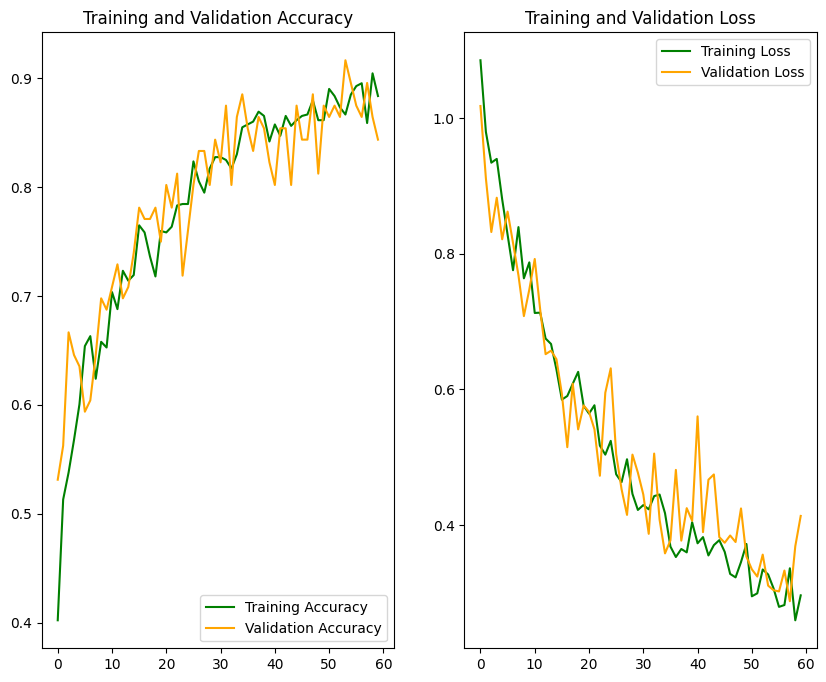

In [25]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(range(60), acc, color='green', label='Training Accuracy')
plt.plot(range(60), val_acc, color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(60), loss, color='green', label='Training Loss')
plt.plot(range(60), val_loss,color='orange', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.5. MAKE PREDICTION ON TEST SET</h4>

In [26]:
# Function that takes an image as an input
# And gives us the confidence score of the prediction

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


2023-04-05 15:41:56.046800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [990]
	 [[{{node Placeholder/_0}}]]
2023-04-05 15:41:56.047582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [990]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 23ms/step


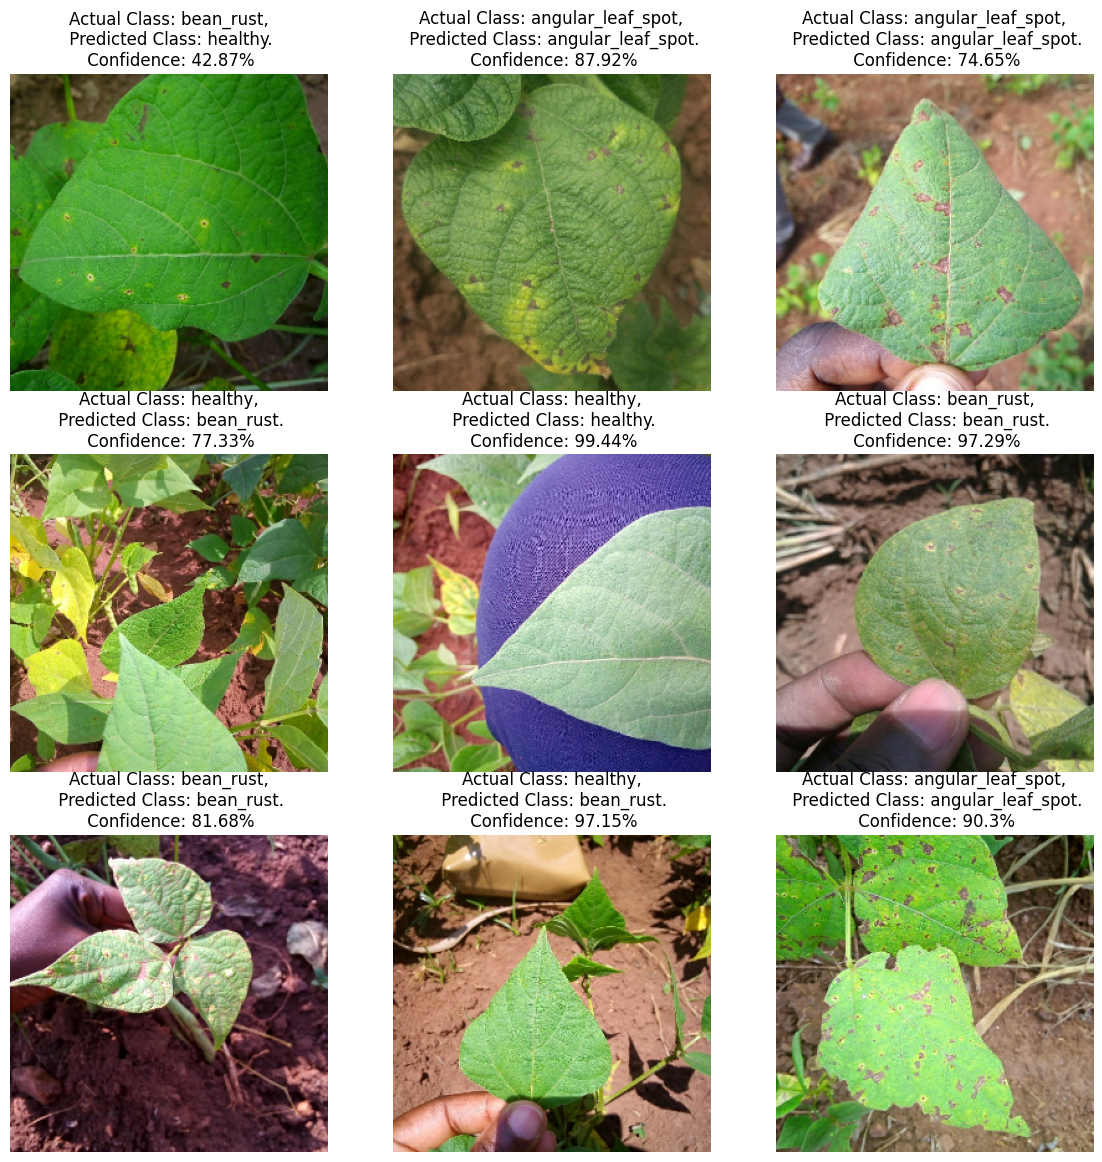

In [27]:
# Let's predict the first 9 images in the first batch
class_names = bean_classes

plt.figure(figsize=(14, 14))
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual Class: {actual_class},\n Predicted Class: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        

# 7. Save Model

In [28]:
model.save(os.path.join('models', 'bean_disease_model.h5'))

In [30]:
# load model from disk
model = load_model(os.path.join('models', 'bean_disease_model.h5'))

image_test = tf.keras.preprocessing.image.load_img(os.path.join('Bean_Dataset', 'healthy', 'healthy_01.jpg'), target_size=(256, 256))
image_test = tf.keras.preprocessing.image.img_to_array(image_test)
image_test = tf.expand_dims(image_test, 0)

# predict the class
pred = model.predict(image_test)

# print class and probability
print(class_names[np.argmax(pred[0])], round(100 * np.max(pred[0]), 2))

1/1 [==============================] - 0s 100ms/step
healthy 99.98
